<img src = "./images/project-name.png" width = "40%" />

---

<img src = "./images/team-name.png" width = "20%"/>

<img src="https://images.unsplash.com/photo-1569060368645-4ab30c8d8b0e?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1920" width = "40%" />

<img src = "./images/overview.png" width = "15%"/>


1. Introduction to Data and Goal Outline
2. Import Packages and Data
3. Data Exploration
4. Data Preprocessing
5. Model Building
6. Model Prediction
7. Conclusion
<br>

<img src = "./images/introduction.png" width = "20%"/>

The aim of this project is to classify tweets into one of 4 different classes. <br>

The classification system consists of four distinct classes, where each <br>
number refers to the tweet sentiment. <br> 

<br>

The four classes are:

- **Class 2 News:** The tweet links to factual news about climate change
- **Class 1 Pro:** The tweet supportst the belief of man-made climate change
- **Class 0 Neutral:** The tweet neither supports nor refutes the belief
- **Class -1 Anti:** The tweet does not believe in man-made climate change

<br>

The numbers associated with a tweet are used to predict <br> 
if the person believes in climate change or not. <br>

The goal is to build and train a model that is capable of predicting labels <br>
for each of the four sentiment variables.

<img src = "./images/import-packages.png" width = "15%"/>

In [1]:
# Standard Packages

import pandas as pd
import numpy as np
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# Visualisation

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


# Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


# Vectorizers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Training Features

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV


# Performance Measures

from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer


# Filter Warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



<img src = "./images/import-data.png" width = "10%"/>

In [4]:
train = pd.read_csv('resources/data/train.csv')
#test = pd.read_csv('resources/data/test.csv')

<img src = "./images/eda-header.png" width = "40%"/>
---

In [5]:
# view data
train.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [4]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
# Check number of rows and columns
print('Number of rows and columns in train data: {}'.format(train.shape))
print('Number of rows and columns in test data: {}'.format(test.shape))

Number of rows and columns in train data: (15819, 3)
Number of rows and columns in test data: (10546, 2)


### Check for missing data in any of the columns

In [6]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [7]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

### How many posts are there for each sentiment?

In [8]:
post_sum = train.groupby(['sentiment']).count()
post_sum.sort_values('message', ascending=False, inplace=True)
post_sum = post_sum.drop(["tweetid"], axis=1)
post_sum

,message
sentiment,
1,8530
2,3640
0,2353
-1,1296


The positive sentiments have the most posts combined. <br>

<br>

The sentiment that has the least posts is '-1', it <br> 
seems that most people believe in climate change. 

### What are the total words written by each sentiment type?

In [9]:
train['word_count'] = train['message'].apply(lambda x: len(str(x).split(" ")))
word_count = train.groupby('sentiment').sum()
word_count = word_count.drop(["tweetid"], axis=1)
word_count.sort_values('word_count', ascending=False, inplace=True)
word_count

,word_count
sentiment,
1,160425
2,55950
0,38768
-1,23719


Not surprisingly, the most words are written by the posts <br>
with a positive sentiment. <br>

<br>

The sentiment that had the least words was '-1', <br> 
and follows the trend above.

In [ ]:
# add average values here later

### Distribution of the Sentiment Values

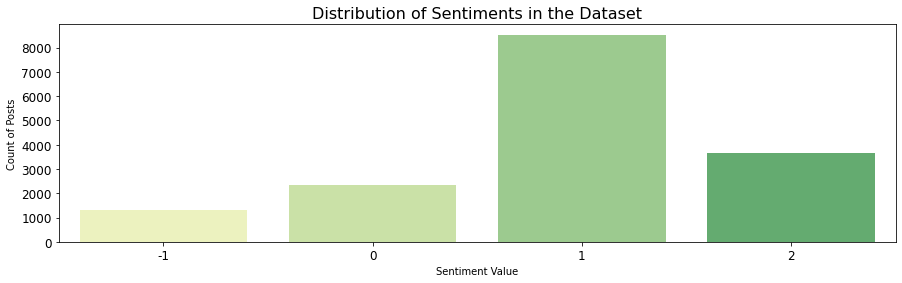

In [10]:

# Setup chart size
dim = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dim)


# Create color palette
cmrmap = sns.color_palette('YlGn')
sns.set_palette(cmrmap)

# Connect data to chart
sns.countplot(x='sentiment', data=train, order=[-1, 0, 1, 2])

# Create labels
plt.title('Distribution of Sentiments in the Dataset', fontsize=16)
plt.xlabel('Sentiment Value')
plt.ylabel('Count of Posts')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

The "Anti" sentiment has the least posts, <br>
whilst the "Pro" sentiment has the most posts. <br>

<br>

This indicates that the data is imbalanced, <br>
and we will need to apply sampling techniques.

In [61]:
# Create a column for each of the 4 sentiment types

#train['Anti'] = train['sentiment'].map(lambda x: 'Anti' if x[0] == "-1" else "")

#train['Neutral'] = train['sentiment'].map(lambda x: 'Neutral' if x[1] == 0 else "")

#train['Pro'] = train['sentiment'].map(lambda x: 'Pro' if x[2] == 1 else "")

#train['News'] = train['sentiment'].map(lambda x: 'News' if x[3] == 2 else "")


train['Anti'] = [1500 if x == '-1' else 70 for x in train['sentiment']]


Let's assess the most common words spoken by each sentiment type:

In [19]:
# Start with one review:

def generate_wordcloud(text, title):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_words=50,background_color='black').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=40)
    plt.show()

In [9]:
text = ''

for tweet in train['message']:
    text =text+ " "+ tweet 

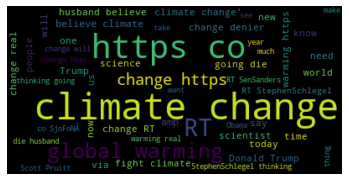

In [20]:
generate_wordcloud(text, '')

In [63]:
train.head()

,sentiment,message,tweetid,word_count,Anti
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,70
1,1,It's not like we lack evidence of anthropogeni...,126103,10,70
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,70
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,70
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,70


In [64]:
# Group together posts 
words_of_mind = train.groupby('Anti')['sentiment'].apply(' '.join).reset_index()
words_of_mind.head()

TypeError: sequence item 0: expected str instance, int found

In [54]:
for i, t in enumerate(words_of_mind['message']):
    text = words_of_mind.iloc[i, 1]
    generate_wordcloud(text, t)

AttributeError: 'DataFrameGroupBy' object has no attribute 'iloc'

### Anti

In [ ]:
# Countplot of the Anti class
# Still needs editing to work

NScolors = sns.xkcd_palette(['blue', 'light blue'])
sns.set_palette(NScolors)
sns.countplot(x='Energy', data=train, order=['Intuitive', 'Sensing'])
plt.title('Intuitive vs. Sensing', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
words_of_anti = train.groupby('Energy')['posts'].apply(' '.join).reset_index()
for i, t in enumerate(words_of_energy['Energy']):
    text = words_of_energy.iloc[i, 1]
    generate_wordcloud(text, t)

### Neutral

In [ ]:
# Countplot of the Anti class
# Still needs editing to work

TFcolors = sns.xkcd_palette(['green', 'pale green'])
sns.set_palette(TFcolors)
sns.countplot(x='Nature', data=train, order=['Thinking', 'Feeling'])
plt.title('Thinking vs. Feeling', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
words_of_neutral = train.groupby('Nature')['posts'].apply(' '.join).reset_index()
for i, t in enumerate(words_of_nature['Nature']):
    text = words_of_nature.iloc[i, 1]
    generate_wordcloud(text, t)

### Pro

In [ ]:
# Countplot of the Pro class
# Still needs editing to work

JPcolors = sns.xkcd_palette(['purple', 'lavender'])
sns.set_palette(JPcolors)
sns.countplot(x='Tactics', data=train, order=['Judging', 'Perceiving'])
plt.title('Judging vs. Perceiving', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Create wordcloud of most used words in all posts

words_of_pro = train.groupby('Tactics')['posts'].apply(' '.join).reset_index()
for i, t in enumerate(words_of_tactics['Tactics']):
    text = words_of_tactics.iloc[i, 1]
    generate_wordcloud(text, t)

### News

In [ ]:
# Countplot of the News class
# Still needs editing to work

JPcolors = sns.xkcd_palette(['purple', 'lavender'])
sns.set_palette(JPcolors)
sns.countplot(x='Tactics', data=train, order=['Judging', 'Perceiving'])
plt.title('Judging vs. Perceiving', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Create wordcloud of most used words in all posts

words_of_news = train.groupby('Tactics')['posts'].apply(' '.join).reset_index()
for i, t in enumerate(words_of_tactics['Tactics']):
    text = words_of_tactics.iloc[i, 1]
    generate_wordcloud(text, t)

The "-" variable containing "-" is more balanced <br>
compared to other variables. 

<br>

The word that seems to appear the most among all the sentiments <br>
is the word "___".

<img src = "./images/data-preprocessing.png" width = "40%"/>
---

The data must be preprocessed with the purpose of removing noise, <br> 
which negatively affects the model's accuracy. <br>

Both the train and test data are preprocessed. <br>

<br>

### Removing delimeters

Each person's posts were made up of ___ individual posts which <br>
were separated by  the string '|||'. <br> 

<br>

There was an attempt to split the data, converting each post <br> 
into the 50 individual posts, with the goal of increasing <br>
the size of the dataset. <br> 

<br>

However this method reduced the accuracy of the model and <br>
was abandoned. We therefore removed the delimiters as part <br>
of the preprocessing. 

In [ ]:
def remove_delimiters (post):
    new = post.replace('|||',' ')
    return ' '.join(new.split())

train['posts'] = train['posts'].apply(remove_delimiters)
test['posts'] = test['posts'].apply(remove_delimiters)

### Removing URLs
Urls do not add any value when analyzing text, therefore they are removed.

In [ ]:
# Remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'

# Apply to train set
train['posts'] = train['posts'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Apply to test set
test['posts'] = test['posts'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#### Convert words to lowercase

Words were converted to lowercase in order to remove noise from capitalisation and to avoid having multiple copies of the same words(eg.'People vs people')

In [ ]:
train['posts'] = train['posts'].str.lower()

test['posts'] = test['posts'].str.lower()

#### Remove punctuation and numbers 

Punctuation doesn’t add any extra information to the text data therefore removing it will help reduce the size of the training data.

In [ ]:
#Remove punctuation & numbers
def remove_punctuation(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

train['posts'] = train['posts'].apply(remove_punctuation)

test['posts'] = test['posts'].apply(remove_punctuation)

In [ ]:
train.head()

### Lemmatization
The words in the dataset are also lemmatized. <br> 

<br>

Lemmatization returns the base or dictionary form of a word, <br>
which is known as the lemma. <br>

Lemmatization is considered to be better than stemming because <br>
lemmatization returns an actual word of the language, and is <br>
used when it is necessary to get valid words.

In [ ]:
# Lematize posts
lemmatizer = WordNetLemmatizer()
train['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in train['posts']]
test['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in test['posts']]

In [ ]:
train.head()

#### Are there any stopwords in the text?

In [ ]:
#Check for stopwords train
stop = stopwords.words('english')
train['stopwords'] = train['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['lemma','stopwords']].head()

In [ ]:
#Check for stopwords test
stop = stopwords.words('english')
test['stopwords'] = test['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
test[['lemma','stopwords']].head()

Stopwords tend to have a negative influence over the accuracy of a model, <br>
therefore these will need to be removed. <br>

<br>

This will be done by vectorizer in the model building section, as <br>
CountVectorizer and TfidfVectorizer have the ability of removing stopwords. <br>

<br>

We will remove the stopwords from the test data to speed up the analysis <br>
when transforming the test data to the vectorizer.

In [ ]:
def remove_stop_words(word):
    if word not in stop:
        return word
    else:
        return ''

In [ ]:
test['lemma_no_stop'] = [' '.join([remove_stop_words(word) for word in text.split(' ')])for text in test['lemma']]

In [ ]:
test.head()

<img src = "./images/model-building.png" width = "35%"/>
---

<img src = "./images/model-prediction.png" width = "40%"/>
---

### Model conclusions

Of the models that were applied the best result was achieved with <br>
LogisticRegression with TfidfVectorizer. <br> 

<br>

SVC with CountVectorizer a very close second. <br>

<br>

MutlinomialNB & RandomForest performance was poor in comparison to these two. <br>

<br>

| Model               | Mind Log Loss | Energy Log Loss | Nature Log Loss | Tactics Log Loss | Average Log Loss | Kaggle Score |
|---------------------|---------------|-----------------|-----------------|------------------|------------------|--------------|
| Logistic Regression |     0.00      |      0.00       |      0.00       |       0.00       |       0.00       |      0.00    |
| SVC                 |     0.00      |      0.00       |      0.00       |       0.00       |       0.00       |      0.00    |
| Random Forest       |     0.00      |      0.00       |      0.00       |       0.00       |       0.00       |      0.00    |
| Multinomial NB      |     0.00      |      0.00       |      0.00       |       0.00       |       0.00       |      0.00    |

<br>

---

<img src = "./images/conclusion.png" width = "30%"/>
---

As observed from above, lorem ipsum dolor sit amet